In [2]:
from keras.datasets import mnist#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2023-02-24 01:39:06.817433: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-24 01:39:06.817494: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-24 01:39:12.779186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-24 01:39:12.779901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-24 01:39:12.779948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

11490434/11490434 [==============================] - 1s 0us/step


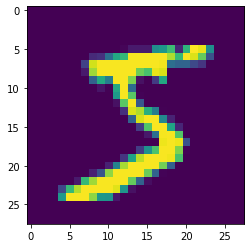

In [3]:
import matplotlib.pyplot as plt#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
from keras.utils import to_categorical#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

2023-02-24 01:45:46.848502: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-24 01:45:46.848556: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-24 01:45:46.848605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Section9): /proc/driver/nvidia/version does not exist


In [13]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

2023-02-24 01:46:17.675571: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 1/3
   1/1875 [..............................] - ETA: 1:14:48 - loss: 26.7697 - accuracy: 0.0000e+00

2023-02-24 01:46:20.426542: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29196288 exceeds 10% of free system memory.
2023-02-24 01:46:20.562903: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29196288 exceeds 10% of free system memory.


   3/1875 [..............................] - ETA: 5:55 - loss: 34.9607 - accuracy: 0.1771      

2023-02-24 01:46:20.762793: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29196288 exceeds 10% of free system memory.
2023-02-24 01:46:20.953127: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29196288 exceeds 10% of free system memory.


1875/1875 [==============================] - 480s 255ms/step - loss: 0.2438 - accuracy: 0.9503 - val_loss: 0.1206 - val_accuracy: 0.9616
Epoch 2/3
1875/1875 [==============================] - 572s 305ms/step - loss: 0.0756 - accuracy: 0.9765 - val_loss: 0.0890 - val_accuracy: 0.9725
Epoch 3/3
1875/1875 [==============================] - 509s 271ms/step - loss: 0.0503 - accuracy: 0.9836 - val_loss: 0.0824 - val_accuracy: 0.9769


In [15]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 [==============================] - 0s 166ms/step


array([[4.0152770e-07, 5.6841728e-14, 4.7957320e-07, 4.0976351e-09,
        2.4672387e-12, 3.5375212e-12, 3.6668951e-16, 9.9999893e-01,
        4.2601126e-08, 1.9680404e-07],
       [5.8664269e-09, 8.7453623e-07, 9.9998617e-01, 7.4535184e-10,
        1.0992069e-11, 3.4659138e-12, 1.2978768e-05, 3.3376117e-14,
        3.5455603e-09, 3.9296476e-17],
       [3.6017422e-09, 9.9998152e-01, 1.2578079e-08, 4.4413759e-10,
        1.4090081e-05, 4.3392241e-08, 8.5612339e-07, 4.2458186e-08,
        3.4303966e-06, 1.3380022e-09],
       [9.9999940e-01, 1.3622414e-14, 1.1491905e-09, 4.6712384e-13,
        4.8893715e-12, 3.4587763e-11, 1.8416030e-07, 1.7787553e-11,
        7.4304374e-10, 3.1740728e-07]], dtype=float32)

In [16]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)